 # Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed_weather_data.csv', index_col='Formatted Date', parse_dates=True)

# Average Temperature Trends From 2006 to 2016

C:\Users\LEGION\AppData\Local\Temp\ipykernel_16500\463636810.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_temp = df.resample('Y')['Temperature (C)'].mean()


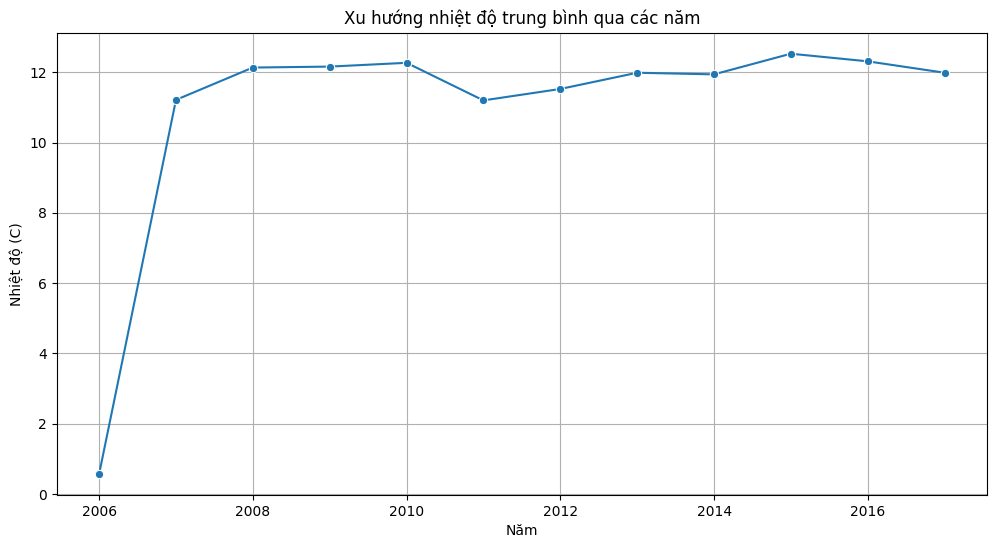

In [17]:
yearly_avg_temp = df.resample('Y')['Temperature (C)'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_temp, marker='o')
plt.title('Xu hướng nhiệt độ trung bình qua các năm')
plt.ylabel('Nhiệt độ (C)')
plt.xlabel('Năm')
plt.grid(True)
plt.savefig('../charts/yearly_temp_trend.png')

### Nhiệt độ và độ ẩm qua các năm

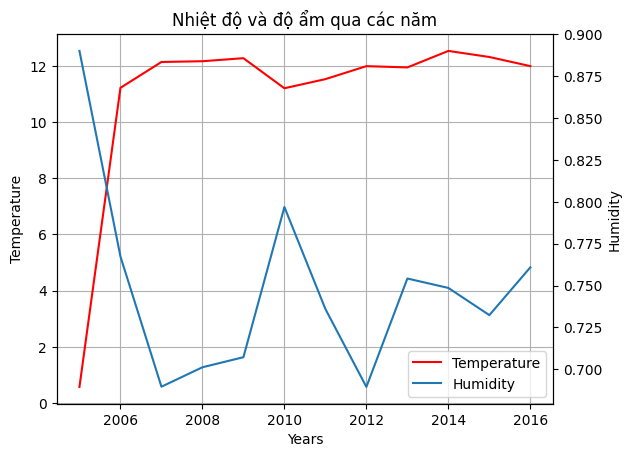

In [4]:
yearly_avg = df.groupby('Year')[['Temperature (C)', 'Humidity']].mean()

fig, ax1 = plt.subplots()
ax1.plot(yearly_avg.index, yearly_avg['Temperature (C)'], 'r', label = 'Temperature')
plt.title('Nhiệt độ và độ ẩm qua các năm')
ax1.set_xlabel('Years')
ax1.set_ylabel('Temperature')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(yearly_avg.index, yearly_avg['Humidity'], label = 'Humidity')
ax2.set_ylabel('Humidity')

lines = ax1.get_lines() + ax2.get_lines()
labels = []
for line in lines:
    labels.append(line.get_label())
ax1.legend(lines, labels, loc = 'best')

plt.savefig('../charts/yearly_temp_and_humid.png')

### nhiệt độ và độ ẩm qua các tháng

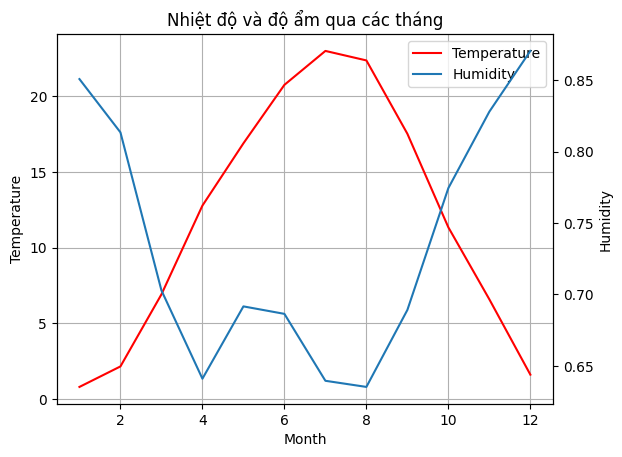

In [5]:
monthly_cycle = df.groupby('Month')[['Temperature (C)', 'Humidity']].mean()
fig, ax1 = plt.subplots()
ax1.plot(monthly_cycle.index, monthly_cycle['Temperature (C)'], 'r', label = 'Temperature')
plt.title('Nhiệt độ và độ ẩm qua các tháng')
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(monthly_cycle.index, monthly_cycle['Humidity'], label = 'Humidity')
ax2.set_ylabel('Humidity')

lines = ax1.get_lines() + ax2.get_lines()
labels = []
for line in lines:
    labels.append(line.get_label())
ax1.legend(lines, labels, loc = 'best')

plt.savefig('../charts/month_temp_and_humid.png')

### nhiệt độ và độ ẩm theo giờ


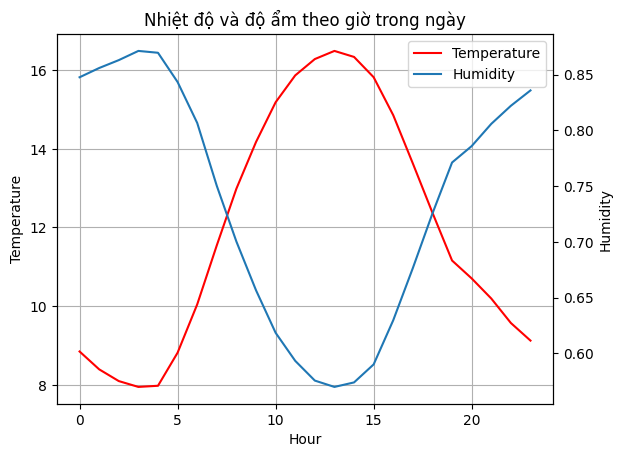

In [6]:
hourly_cycle = df.groupby('Hour')[['Temperature (C)', 'Humidity']].mean()
fig, ax1 = plt.subplots()
ax1.plot(hourly_cycle.index, hourly_cycle['Temperature (C)'], 'r', label = 'Temperature')
plt.title('Nhiệt độ và độ ẩm theo giờ trong ngày')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Temperature')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(hourly_cycle.index, hourly_cycle['Humidity'], label = 'Humidity')
ax2.set_ylabel('Humidity')

lines = ax1.get_lines() + ax2.get_lines()
labels = []
for line in lines:
    labels.append(line.get_label())
ax1.legend(lines, labels, loc = 'best')

plt.savefig('../charts/hour_temp_and_humid.png')

### wind avg year

C:\Users\LEGION\AppData\Local\Temp\ipykernel_16500\3641494913.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Yearly_wind_speed = df[['Wind Speed (km/h)']].resample('Y').mean()


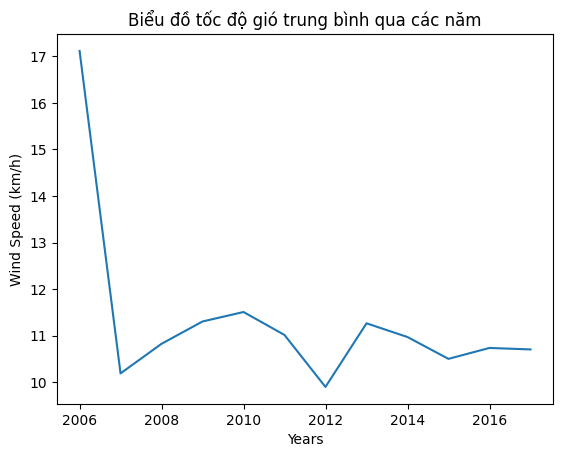

In [7]:
Yearly_wind_speed = df[['Wind Speed (km/h)']].resample('Y').mean()

plt.plot(Yearly_wind_speed.index, Yearly_wind_speed['Wind Speed (km/h)'])
plt.title('Biểu đồ tốc độ gió trung bình qua các năm')
plt.xlabel('Years')
plt.ylabel('Wind Speed (km/h)')

plt.savefig('../charts/yearly_wind_speed.png')

### sự chênh lệch giữa nhiệt độ thực tế và nhiệt độ cảm nhận

Text(0.5, 1.0, 'Biểu đồ thể hiện Temperature và Apparent Temperature qua các tháng')

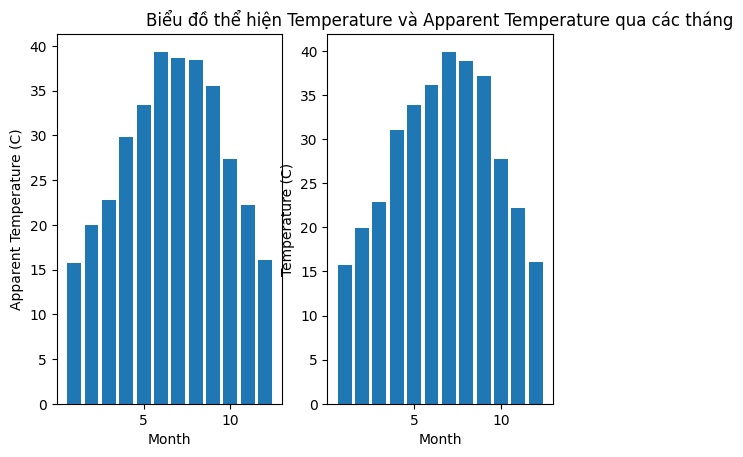

In [18]:
#cần sửa thêm
monthly_diff= df.groupby('Month')[['Apparent Temperature (C)', 'Temperature (C)']].max()
monthly_diff['Temp_Gap'] = monthly_diff['Apparent Temperature (C)'] - monthly_diff['Temperature (C)']
monthly_diff.groupby("Month")['Temp_Gap']

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows= 1)
ax1.bar(monthly_diff.index,monthly_diff['Apparent Temperature (C)'])
ax1.set_xlabel('Month')
ax1.set_ylabel('Apparent Temperature (C)')

ax2.bar(monthly_diff.index,monthly_diff['Temperature (C)'])
ax2.set_xlabel('Month')
ax2.set_ylabel('Temperature (C)')

plt.title('Biểu đồ thể hiện Temperature và Apparent Temperature qua các tháng')


# Weather pattern relation matrix

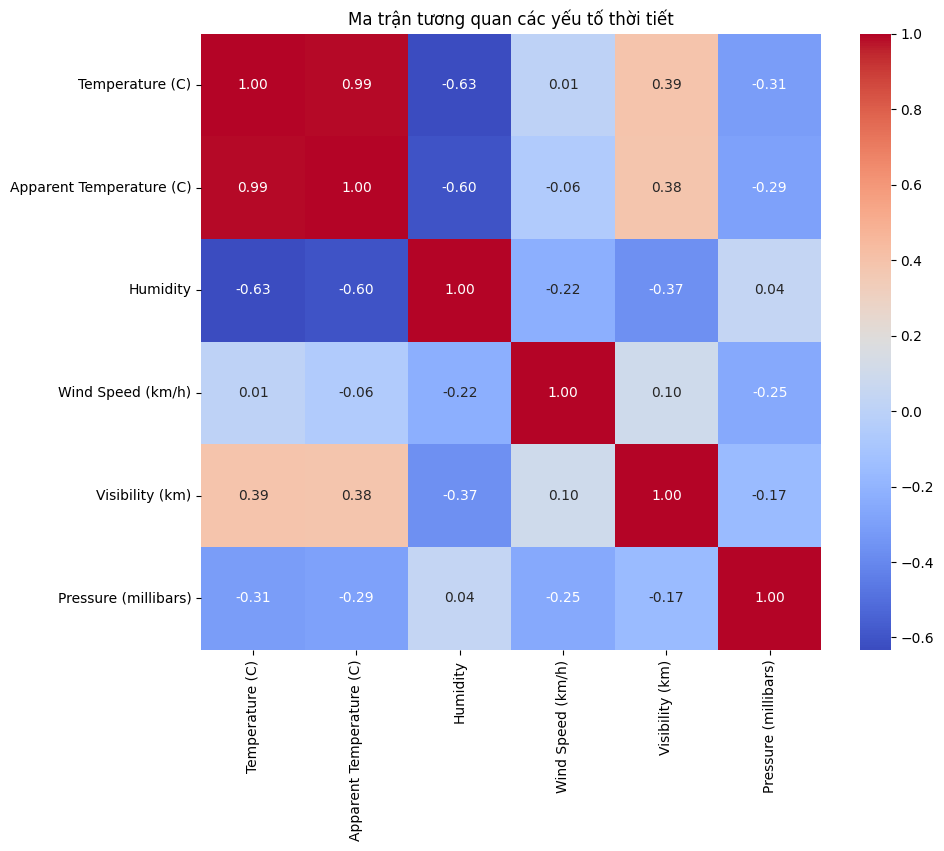

In [9]:
numeric_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan các yếu tố thời tiết')
plt.savefig('../charts/correlation_heatmap.png')

### common summary

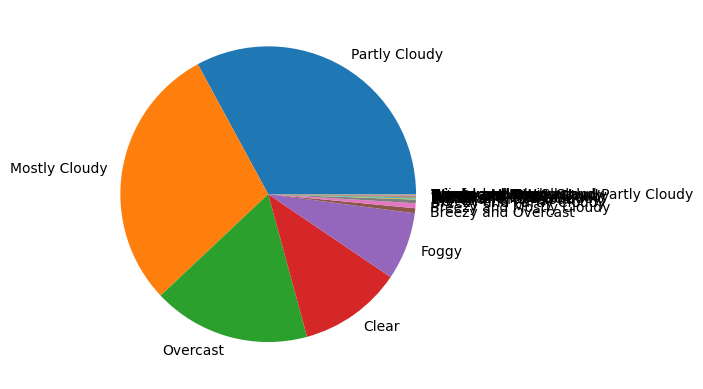

In [10]:
#sửa thêm cho cái đống bùi nhùi kia = 'Khác'

summary_common = df['Summary'].value_counts()
plt.pie(summary_common.values, labels = summary_common.index);

### nhiệt độ trung bình qua các tháng khi trời foggy và clear

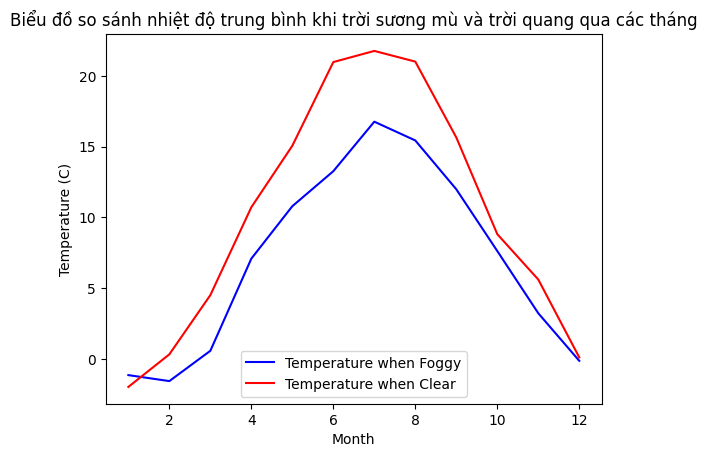

In [11]:
foggy = df[df['Summary'] == 'Foggy']
foggy_tem_avg = foggy.groupby('Month')[['Temperature (C)']].mean()

clear = df[df['Summary'] == 'Clear']
clear_tem_avg = clear.groupby('Month')[['Temperature (C)']].mean()


plt.plot(foggy_tem_avg.index, foggy_tem_avg, 'b', label='Temperature when Foggy')
plt.plot(clear_tem_avg.index, clear_tem_avg, 'r', label='Temperature when Clear')

plt.title('Biểu đồ so sánh nhiệt độ trung bình khi trời sương mù và trời quang qua các tháng')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')

plt.legend()
plt.savefig('../charts/foggy_and_clear.png')


### nhiệt độ khi trời mưa, tuyết, none

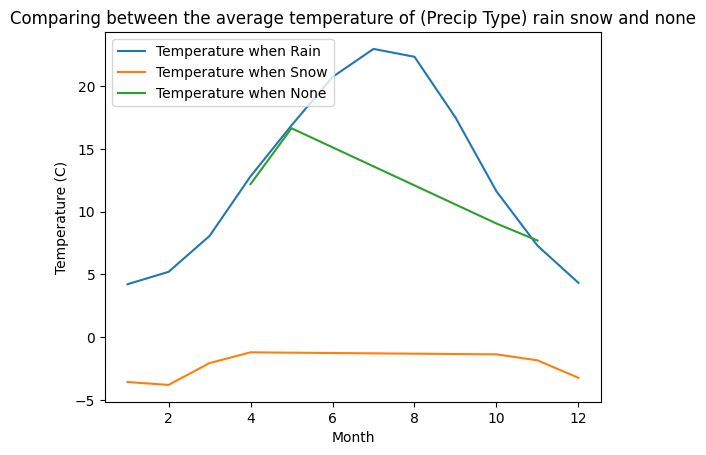

In [12]:
rain = df[df["Precip Type"] == 'rain']
rain_tem_avg = rain.groupby('Month')[['Temperature (C)']].mean()

snow = df[df['Precip Type'] == 'snow']
snow_tem_avg = snow.groupby('Month')[['Temperature (C)']].mean()

none_precip = df[df['Precip Type'] == 'none']
none_tem_avg = none_precip.groupby('Month')[['Temperature (C)']].mean()

plt.plot(rain_tem_avg.index, rain_tem_avg, label = 'Temperature when Rain')
plt.plot(snow_tem_avg.index, snow_tem_avg, label = 'Temperature when Snow')
plt.plot(none_tem_avg.index, none_tem_avg, label = 'Temperature when None')
plt.title('Comparing between the average temperature of (Precip Type) rain snow and none')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.legend()
plt.savefig('../charts/rain_snow_none.png')

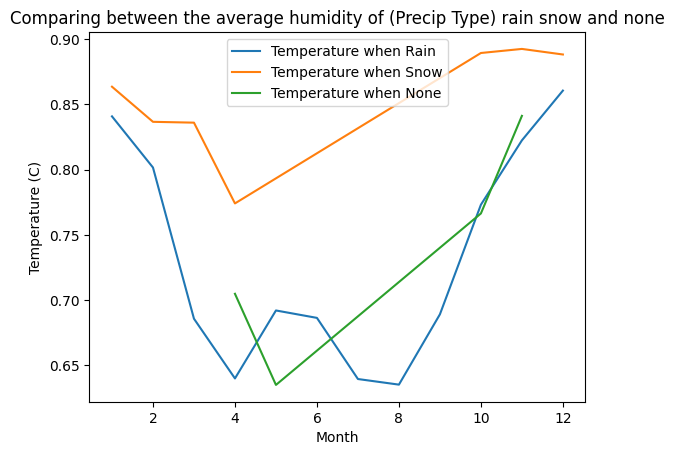

In [13]:
#Comparing between the average humidity of (Precip Type) rain snow and none

rain_humid = df[df["Precip Type"] == 'rain']
rain_humid_avg = rain_humid.groupby('Month')[['Humidity']].mean()

snow_humid = df[df['Precip Type'] == 'snow']
snow_humid_avg = snow_humid.groupby('Month')[['Humidity']].mean()

none_precip_humid = df[df['Precip Type'] == 'none']
none_humid_avg = none_precip_humid.groupby('Month')[['Humidity']].mean()

plt.plot(rain_humid_avg.index, rain_humid_avg, label = 'Temperature when Rain')
plt.plot(snow_humid_avg.index, snow_humid_avg, label = 'Temperature when Snow')
plt.plot(none_humid_avg.index, none_humid_avg, label = 'Temperature when None')
plt.title('Comparing between the average humidity of (Precip Type) rain snow and none')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.legend()

plt.savefig('../charts/humid_rain_snow_none.png')

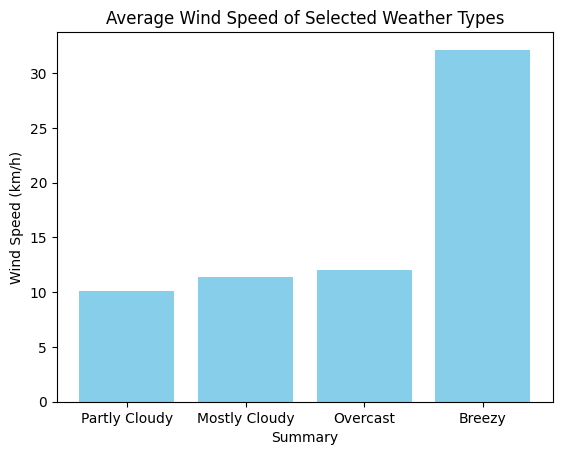

<Figure size 640x480 with 0 Axes>

In [14]:
#Comparing between the average wind speed of (sumary) Breezy and Mostly Cloudy, Overcast Partly Cloudy
wind_by_summary = df.groupby('Summary')['Wind Speed (km/h)'].mean().sort_values()
selected = ['Breezy', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy']
wind_selected = wind_by_summary[wind_by_summary.index.isin(selected)]

plt.bar(wind_selected.index, wind_selected.values, color='skyblue')

plt.title('Average Wind Speed of Selected Weather Types')
plt.xlabel('Summary')
plt.ylabel('Wind Speed (km/h)')

plt.show()

plt.savefig('../charts/windspeed_summary.png')


# Extremes Analysis

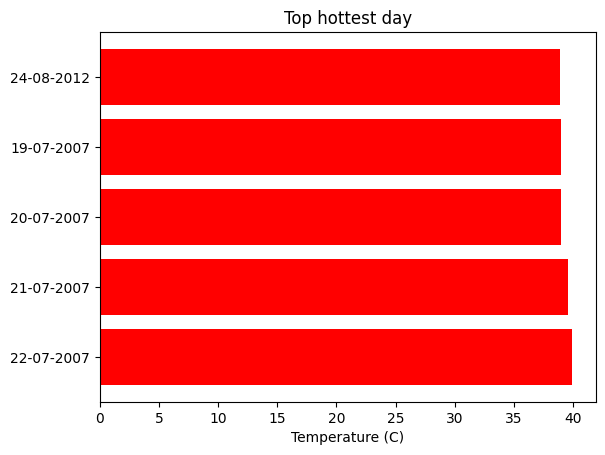

In [15]:
# Top hottest days
top_hotest = df.sort_values(by='Temperature (C)', ascending=False).head(10)
# chuyển index datetime thành chuỗi 
date = top_hotest.index.strftime('%d-%m-%Y')

plt.barh(date, top_hotest['Temperature (C)'], color = 'red')
plt.title('Top hottest day')
plt.xlabel('Temperature (C)')

plt.savefig('../charts/hotest_day.png')

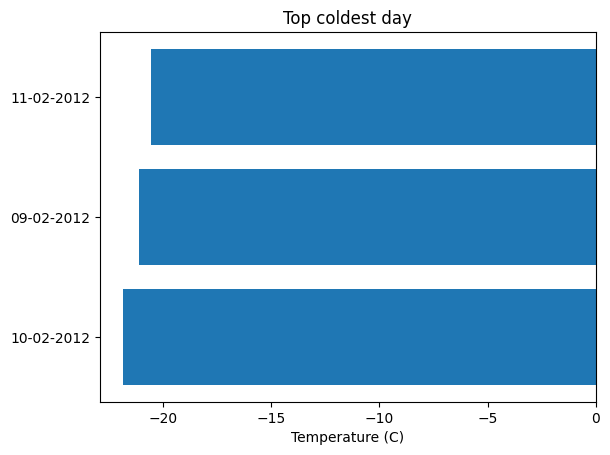

In [16]:
# Top ten coldest days
top_coldest = df.sort_values(by='Temperature (C)', ascending=True).head(10)
date = top_coldest.index.strftime('%d-%m-%Y')
plt.barh(date, top_coldest['Temperature (C)'])
plt.title('Top coldest day')
plt.xlabel('Temperature (C)')
plt.savefig('../charts/coldest_day.png')